### Image recognition

In [1]:
import tensorflow.keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [202]:
#Labels of image classes
class_labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
np.array(class_labels).T

array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
       'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], dtype='<U11')

In [11]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [7]:
x_train.shape

(60000, 28, 28)

Pullover


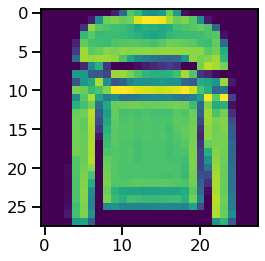

In [18]:
#Let's see the image
sns.set_context('talk')
sns.set_palette('dark')
plt.imshow(x_train[5])
print(class_labels[y_train[5]])

In [22]:
num_classes = len(class_labels)

y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [23]:
y_train[3:20].dtype

dtype('float32')

In [34]:
print('Max pixel value is {}, min pixel value is {}'.format(x_train.max(),x_train.min()))

Max pixel value is 1.0, min pixel value is 0.0


In [31]:
#Scaling data and setting the right parameters
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [37]:
#Adding one more dimension to feed it to Conv2D NN layer
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

In [38]:
x_train.shape[1:]

(28, 28, 1)

In [40]:
# First CNN model

model_1 = Sequential()


## 3x3 convolution with 1x1 stride and 16 filters
model_1.add(Conv2D(16, (3, 3), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 3x3 convolution with 1x1 stride and 16 filters
model_1.add(Conv2D(16, (3, 3), strides = (1,1)))
model_1.add(Activation('relu'))

## Another 3x3 convolution with 1x1 stride and 16 filters
model_1.add(Conv2D(16, (3, 3), strides = (1,1)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to n x n x 16
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.3))

## Flatten turns nxnx16 into 288x1
model_1.add(Flatten())
model_1.add(Dense(256))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 16)        2320      
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
activation_7 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)       

In [42]:
batch_size = 64

# initiate Adam optimizer
opt = tensorflow.keras.optimizers.Adam(lr=0.001)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=3,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/3
938/938 [==============================] - 94s 100ms/step - loss: 0.4184 - accuracy: 0.8508 - val_loss: 0.3140 - val_accuracy: 0.8895
Epoch 2/3
938/938 [==============================] - 93s 99ms/step - loss: 0.3067 - accuracy: 0.8888 - val_loss: 0.2796 - val_accuracy: 0.8952
Epoch 3/3
938/938 [==============================] - 92s 98ms/step - loss: 0.2625 - accuracy: 0.9032 - val_loss: 0.2433 - val_accuracy: 0.9097


In [46]:
#Accuracy of the model 1
score_model_1=model_1.evaluate(x_test,y_test)
print('Validation set: loss is {:.3f}; accuracy is {:.3f}'.format(score_model_1[0],score_model_1[1]))

313/313 [==============================] - 4s 14ms/step - loss: 0.2433 - accuracy: 0.9097
Validation set: loss is 0.243; accuracy is 0.910


In [51]:
# First CNN model

model_2 = Sequential()


## 3x3 convolution with 2x2 stride and 24 filters
model_2.add(Conv2D(24, (3, 3), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))

## Another 3x3 convolution with 1x1 stride and 24 filters
model_2.add(Conv2D(24, (3, 3), strides = (1,1), padding='valid'))
model_2.add(Activation('relu'))

## Another 3x3 convolution with 1x1 stride and 24 filters
model_2.add(Conv2D(24, (3, 3), strides = (1,1)))
model_2.add(Activation('relu'))

## 2x2 max pooling reduces to 5 x 5 x 24
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.2))

## Flatten turns 5x5x24 into 600
model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 14, 14, 24)        240       
_________________________________________________________________
activation_28 (Activation)   (None, 14, 14, 24)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 12, 24)        5208      
_________________________________________________________________
activation_29 (Activation)   (None, 12, 12, 24)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 10, 10, 24)        5208      
_________________________________________________________________
activation_30 (Activation)   (None, 10, 10, 24)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 24)         

In [52]:
# initiate RMSprop optimizer
opt_2 = tensorflow.keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt_2,
              metrics=['accuracy'])

model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/5
938/938 [==============================] - 39s 40ms/step - loss: 0.6189 - accuracy: 0.7716 - val_loss: 0.4421 - val_accuracy: 0.8356
Epoch 2/5
938/938 [==============================] - 37s 39ms/step - loss: 0.4118 - accuracy: 0.8501 - val_loss: 0.3810 - val_accuracy: 0.8649
Epoch 3/5
938/938 [==============================] - 37s 40ms/step - loss: 0.3589 - accuracy: 0.8695 - val_loss: 0.3409 - val_accuracy: 0.8729
Epoch 4/5
938/938 [==============================] - 37s 40ms/step - loss: 0.3274 - accuracy: 0.8814 - val_loss: 0.3107 - val_accuracy: 0.8880
Epoch 5/5
938/938 [==============================] - 37s 40ms/step - loss: 0.3077 - accuracy: 0.8887 - val_loss: 0.3083 - val_accuracy: 0.8889


In [53]:
#Run 5 more epochs
model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/5
938/938 [==============================] - 37s 40ms/step - loss: 0.2948 - accuracy: 0.8928 - val_loss: 0.2876 - val_accuracy: 0.8965
Epoch 2/5
938/938 [==============================] - 37s 40ms/step - loss: 0.2812 - accuracy: 0.8981 - val_loss: 0.2848 - val_accuracy: 0.8963
Epoch 3/5
938/938 [==============================] - 37s 40ms/step - loss: 0.2726 - accuracy: 0.9014 - val_loss: 0.2800 - val_accuracy: 0.8993
Epoch 4/5
938/938 [==============================] - 37s 40ms/step - loss: 0.2655 - accuracy: 0.9033 - val_loss: 0.2729 - val_accuracy: 0.9023
Epoch 5/5
938/938 [==============================] - 38s 40ms/step - loss: 0.2604 - accuracy: 0.9065 - val_loss: 0.2725 - val_accuracy: 0.9024


In [54]:
#Accuracy of the model 2
score_model_2=model_2.evaluate(x_test,y_test)
print('Validation set: loss is {:.3f}; accuracy is {:.3f}'.format(score_model_2[0],score_model_2[1]))

313/313 [==============================] - 2s 7ms/step - loss: 0.2725 - accuracy: 0.9024: 0s - loss: 0.2
Validation set: loss is 0.272; accuracy is 0.902


In [70]:
np.random.randint(0,x_test.shape[0], 4)

array([6808,  769, 2317, 8728])

[4]


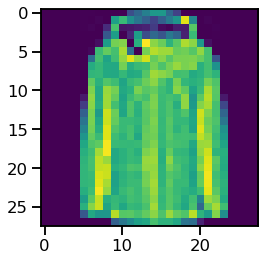

In [81]:
print(model_1.predict_classes(np.expand_dims(x_test[769],axis=0)))
plt.imshow(x_test[769])

In [208]:
np.sqrt(9)%1==0

True

In [215]:
def show_predicted_images(model,num_images_in_row=2,num_images_in_col=2):
    num_images=num_images_in_col*num_images_in_row
    fig = plt.figure(figsize=(16, 16))
    fig.suptitle('Objects recognised by deep learning')
    im_numbers=np.random.randint(0,x_test.shape[0], num_images)
    for i in range(num_images):
        ax = fig.add_subplot(num_images_in_row, num_images_in_col, i+1)
        ax.imshow(x_test[im_numbers[i]])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set(title=str(class_labels[model.predict_classes(np.expand_dims(x_test[im_numbers[i]],axis=0))[0]]))

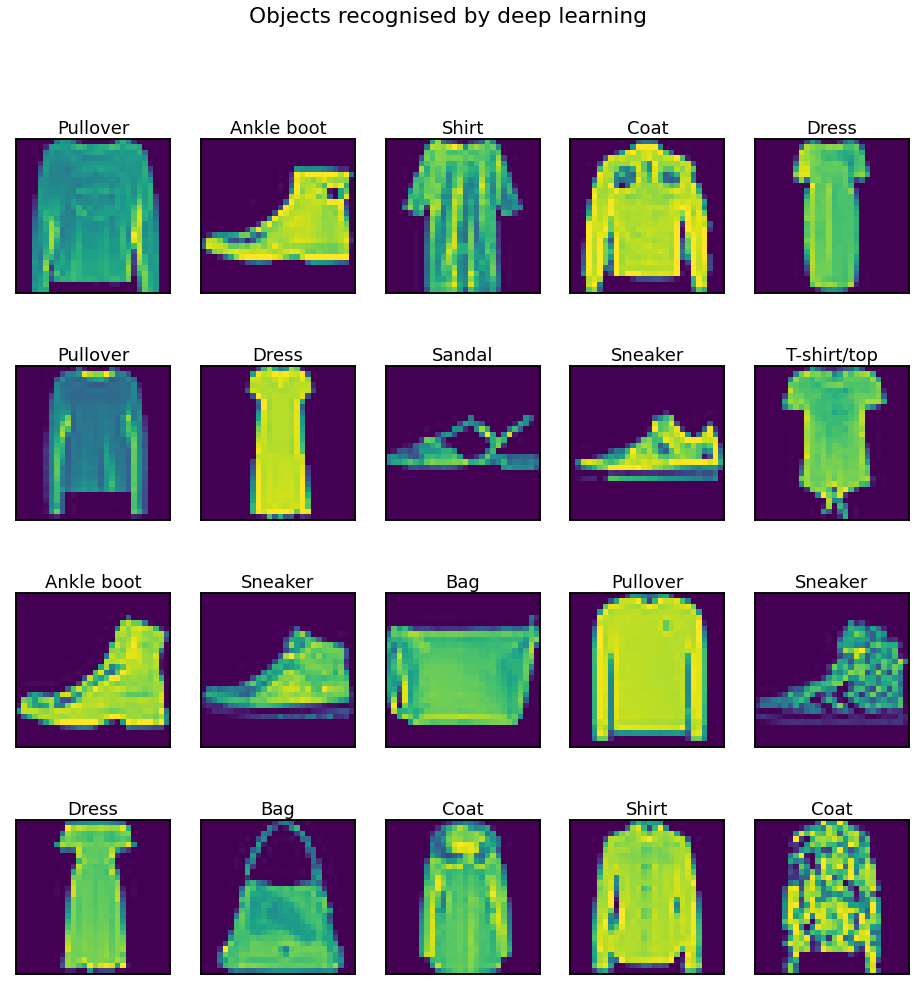

In [220]:
show_predicted_images(model_1,4,5)

### Classification for supervised machine learning using Neural networks

In [113]:
import pandas as pd

In [114]:
data_df=pd.read_csv('riceClassification.csv',sep=',')

In [115]:
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [122]:
data_df.Class.value_counts(normalize=True)

1    0.549079
0    0.450921
Name: Class, dtype: float64

In [123]:
rice_classes=['Gonen','Jasmine']

In [126]:
data_df_original=data_df.copy()

In [127]:
data_df=data_df.drop(['id'],axis=1)

In [137]:
data_df.shape

(18185, 11)

In [125]:
from sklearn.model_selection import train_test_split

In [151]:
X_rice_train, X_rice_test, y_rice_train, y_rice_test=train_test_split(data_df.drop(['Class'],axis=1),data_df['Class'], test_size=0.3, random_state=1)

In [152]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_rice_train_ss=scaler.fit_transform(X_rice_train)
X_rice_test_ss=scaler.transform(X_rice_test)

In [153]:
num_features=len(X_rice_train.columns)
num_features

10

In [154]:
#Make a simple model with 1 hidden layer
model_rice_1=Sequential()
model_rice_1.add(Dense(20, input_shape=(num_features,)))
model_rice_1.add(Activation('relu'))
model_rice_1.add(Dense(1, activation='sigmoid'))

model_rice_1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 20)                220       
_________________________________________________________________
activation_34 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 21        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [182]:
opt=tensorflow.keras.optimizers.RMSprop(learning_rate=0.0005)

model_rice_1.compile(optimizer=opt,
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [183]:
y_rice_train.shape

(12729,)

In [184]:
batch_size_2=256
val_accuracy, epochs_passed=[],[]
epochs=150
for i in range(1,epochs+1):
    model_rice_1.fit(X_rice_train,y_rice_train, batch_size=batch_size_2,validation_data=(X_rice_test, y_rice_test),epochs=1,verbose=0)
    if i%3==0:
        val_accuracy.append(model_rice_1.evaluate(X_rice_test,y_rice_test,verbose=0)[1])
        epochs_passed.append(i)

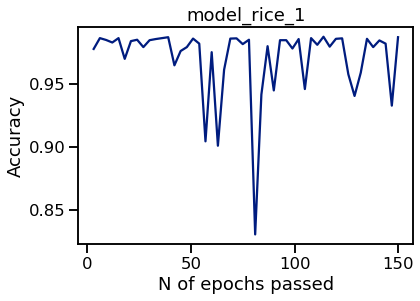

In [185]:
def plot_validation_accuracy(epochs_passed, val_accuracy, model):
    plt.plot(epochs_passed,val_accuracy)
    plt.title(model)
    plt.xlabel('N of epochs passed')
    plt.ylabel('Accuracy')
plot_validation_accuracy(epochs_passed, val_accuracy, 'model_rice_1')

In [203]:
valacc_max_model_rice_1=max(val_accuracy)
print('Maximal validation accuracy for model_rice_1 is {:.3f}'.format(valacc_max_model_rice_1))

Maximal validation accuracy for model_rice_1 is 0.987


In [169]:
#Make a more complicated NN
#Make a simple model with 1 hidden layer
model_rice_2=Sequential()
model_rice_2.add(Dense(20, input_shape=(num_features,),activation='relu'))
model_rice_2.add(Dense(20,activation='relu'))
model_rice_2.add(Dense(6,activation='relu'))
model_rice_2.add(Dense(1, activation='sigmoid'))

model_rice_2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_17 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 126       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 7         
Total params: 773
Trainable params: 773
Non-trainable params: 0
_________________________________________________________________


In [187]:
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.0005)

model_rice_2.compile(optimizer=opt,
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [188]:
batch_size_2=256
val_accuracy, epochs_passed=[],[]
epochs=150
for i in range(1,epochs+1):
    model_rice_1.fit(X_rice_train,y_rice_train, batch_size=batch_size_2,validation_data=(X_rice_test, y_rice_test),epochs=1,verbose=0)
    if i%3==0:
        val_accuracy.append(model_rice_1.evaluate(X_rice_test,y_rice_test,verbose=0)[1])
        epochs_passed.append(i)

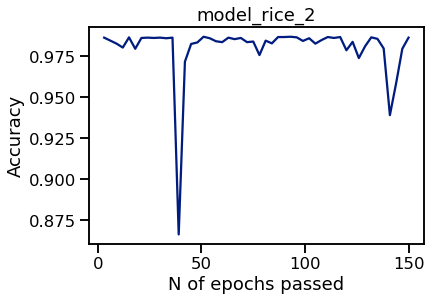

In [189]:
plot_validation_accuracy(epochs_passed, val_accuracy, 'model_rice_2')

In [190]:
valacc_max_model_rice_2=max(val_accuracy)
print('Maximal validation accuracy for model_rice_2 is {:.3f}'.format(valacc_max_model_rice_2))

Maximal validation accuracy for model_rice_2 is 0.987


In [193]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [194]:
rf=RandomForestClassifier(n_estimators=50)
rf=rf.fit(X_rice_train,y_rice_train)

In [196]:
y_pred=rf.predict(X_rice_test)
print('Accuracy with Random Forest is {:.3f}'.format(accuracy_score(y_rice_test,y_pred)))

Accuracy with Random Forest is 0.989
